In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, e, epsilon_0, c, m_u, k, m_e, alpha
from Reflectivity_our import *
import pyhc as pc_git


In [115]:
def Pressure(T):
    """Vapor pressure in a thermal cell
    expects T in Kelvin"""
    # return 7e-8 # <--- USE THIS for finding background P
    if (T<312.46):
        return 10**( -94.04826 - 1961.258/T - 0.03771687*T + 42.57526*np.log10(T) )
    else:
        return 10**( 15.88253 - 4529.635/T + 0.00058663*T - 2.99138*np.log10(T) )
    
def wavelength_to_pulsation(wl):
    return (2*np.pi*c)/(wl)

def pulsation_to_wavelength(om):
    return (2*np.pi*c)/(om)

In [116]:
T = 200
N = Pressure(T)*133.323/(k*T)
print(N)


1789856166.5598528


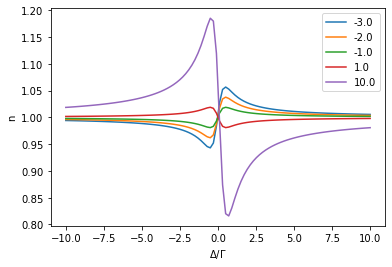

In [117]:
lambda_at = 780*1e-9
gamma = 6 #MHz

detuning = np.linspace(-10,10,100)

chi1 = -N*3*((lambda_at**3)/(4*np.pi**2))*((2*detuning/gamma)-1j)/(1+4*(detuning/gamma)**2)
disp_indice = np.real(np.sqrt(1+chi1))

#plt.plot(detuning,disp_indice)
#plt.xlabel('detuning')
#plt.ylabel('n')

def chi(rho_lam3,delta_gamma):
    return -3*((rho_lam3)/(4*np.pi**2))*((2*delta_gamma)-1j)/(1+4*(delta_gamma)**2)

def n(rho_lam3,delta_gamma):
    return np.real(np.sqrt(1+chi(rho_lam3,delta_gamma)))

def nxi(xi):
    return np.real(np.sqrt(1+xi))

delta_gamma = np.linspace(-10,10,100)
rho_lambda = np.array([1*e-3,1*e-2,1*e-1,1,10])
wavelength = 720*1e-9
omegasteck = wavelength_to_pulsation(wavelength)
plt.figure()
for rho_lam in rho_lambda:
    plt.plot(delta_gamma,n(rho_lam,delta_gamma),label = rho_lam)
plt.xlabel(r'$\Delta/\Gamma$')
plt.legend()
plt.ylabel('n')
plt.savefig('figures/n_vs_delta.pdf')
plt.show()
plt.close()

In [118]:
def Xii(rho_lambda,delta_gamma):
    return -3*(rho_lambda/(4*np.pi**2))*((2*delta_gamma))/(1+4*(delta_gamma)**2)

rho_lambda = np.linspace(1e-3,10,10000)
detuning = np.linspace(-10,10,10000)
X,Y = np.meshgrid(rho_lambda,detuning)
Z = nxi(Xii(X,Y))
maxN = np.max(Z)
plt.figure()
plt.xlabel(r'$\rho_{at}\lambda_{at}^{3}$')
plt.ylabel(r'$\Delta/\Gamma$')
plt.imshow(Z)
plt.title(r'$n_{at}$ '+f'\nmax={maxN:.3f}') 
plt.colorbar()
plt.savefig('figures/xi.pdf')
plt.close()

/home/acastillo/Documents/Master/M1/S1/QIF/QIF_PhotonicCristals/pyhc.py:108: RuntimeWarning: overflow encountered in sin
  A11 = A * np.sin(N * K * L) / np.sin(K * L) - np.sin(
/home/acastillo/Documents/Master/M1/S1/QIF/QIF_PhotonicCristals/pyhc.py:108: RuntimeWarning: invalid value encountered in cdouble_scalars
  A11 = A * np.sin(N * K * L) / np.sin(K * L) - np.sin(
/home/acastillo/Documents/Master/M1/S1/QIF/QIF_PhotonicCristals/pyhc.py:110: RuntimeWarning: overflow encountered in sin
  A12 = B * np.sin(N * K * L) / np.sin(K * L)
/home/acastillo/Documents/Master/M1/S1/QIF/QIF_PhotonicCristals/pyhc.py:110: RuntimeWarning: invalid value encountered in cdouble_scalars
  A12 = B * np.sin(N * K * L) / np.sin(K * L)
/home/acastillo/Documents/Master/M1/S1/QIF/QIF_PhotonicCristals/pyhc.py:111: RuntimeWarning: overflow encountered in sin
  A21 = C * np.sin(N * K * L) / np.sin(K * L)
/home/acastillo/Documents/Master/M1/S1/QIF/QIF_PhotonicCristals/pyhc.py:111: RuntimeWarning: invalid value enco

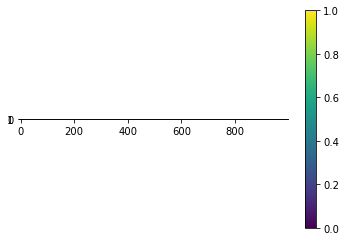

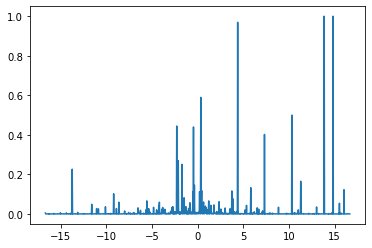

In [121]:
def chi_delta_gamma(rho_lam3,delta,gamma):
    return -3*((rho_lam3)/(4*np.pi**2))*((2*delta/gamma)-1j)/(1+4*(delta/gamma)**2)
def lambda_to_delta(laserwl):
    return omegasteck-wavelength_to_pulsation(laserwl)
    
wllaser = 800*e-9
N=100000
nair = 1
n_inc= nair
n2_new= nair
n_sub= nair
d1_new = wllaser/4
d2_new = wllaser/4

Nrho = 2
rholambda = np.linspace(1,10,Nrho)
Nomega = 1000
omegalaser = np.linspace(omegasteck-100*1e6,omegasteck+100*1e6,Nomega)
r_image = np.zeros([Nrho,Nomega])



gamma = 6*1e6 
v_wl = pulsation_to_wavelength(omegalaser)
i = 0
plt.figure()
for rho_lam in rholambda:
    reflect =np.array([pc_git.rN(d1_new*1e9,d2_new*1e9,nxi(chi_delta_gamma(rho_lam,lambda_to_delta(l),gamma)),n2_new,n_inc,n_sub,N,pc_git.f_omega(l),0.0) for l in v_wl])
    r_image[i,:]=reflect
    i+=1
plt.imshow(r_image)
plt.colorbar()
plt.savefig('figures/reflectivity_atome.pdf')
plt.figure()
plt.plot((omegalaser-omegasteck)/gamma,r_image[1,:])
plt.savefig('figures/reflectivity_atome_2.pdf')
plt.show()